In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],     # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
X.shape

(10, 2)

In [4]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [7]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

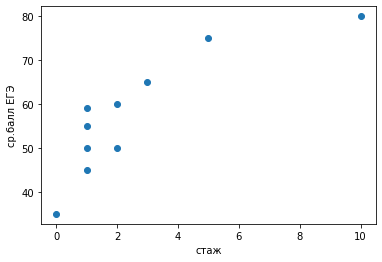

In [8]:
plt.scatter(X[:,1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

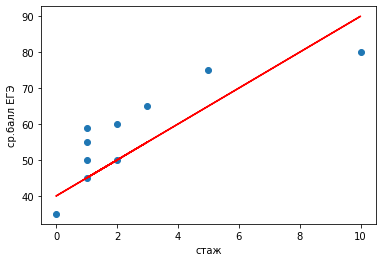

In [9]:
# y = m * x + b
m = 5
b = 40
plt.scatter(X[:,1], y);
plt.plot(X[:,1],  m * X[:,1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [11]:
y_pred1 = 40 + 5 * X[:,1] 
y_pred2 = 40 + 5 * X[:,1]

In [12]:
y_pred1

array([45, 45, 50, 45, 55, 40, 65, 90, 45, 50])

In [13]:
y_pred2

array([45, 45, 50, 45, 55, 40, 65, 90, 45, 50])

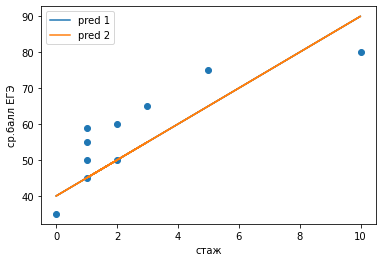

In [14]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_pred1, label='pred 1')
plt.plot(X[:,1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [15]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(4.4, 4.4)

In [16]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(7.4, 7.4)

In [17]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(74.6, 74.6)

In [18]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
rmse_1, rmse_2

(8.637129152675673, 8.637129152675673)

In [19]:
X.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [20]:
X.T @ X

array([[ 10,  26],
       [ 26, 146]])

In [21]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([47.23214286,  3.91071429])

In [22]:
w_ = [40, 5]
print(X @ w_)
print(np.dot(w_, X.T))
print(np.dot(X, w_))
print(w_[0] * X[:,0] + w_[1] * X[:,1])
print(np.sum(w_ * X, axis=1))

[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]


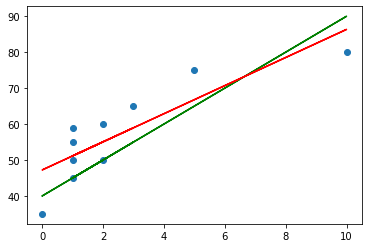

In [23]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 40 + X[:,1] * 5, color='g')
plt.plot(X[:,1], w[0] + w[1] * X[:,1], color='red');

In [24]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [25]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(7.4, 74.6)

In [26]:
y_pred3 = w[0] * X[:,0] + w[1] * X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [27]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142858, 45.93749999999999)

In [28]:
n = 10
eta = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X.T * (np.sum(w * X, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X.T, (np.dot(X, w) - y))
w, w - eta * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

### Домашние задания

1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?  

In [29]:
n = X.shape[0]
eta = 1e-3
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428638
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.96206460054725
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


In [33]:
n = X.shape[0]
eta = 1e-2
iterations = 201
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135


In [43]:
n = X.shape[0]/5
eta = 1e-2
iterations = 501
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [ 6.51 17.5 ] 3173.15
100 [47.03142979  3.94777749] 45.96159894380851
200 [47.23117922  3.91089223] 45.93750055548497
300 [47.23213823  3.91071514] 45.937500000012804
400 [47.23214283  3.91071429] 45.93749999999999
500 [47.23214286  3.91071429] 45.9375


!!! Уменьшив шаг, мы значительно быстрее достигаем желаемого результата.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [54]:
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))) # ошибка исправлена!
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [ 6.51 17.5 ] 3173.15
100 [47.03142979  3.94777749] 45.96159894380851
200 [47.23117922  3.91089223] 45.93750055548497
300 [47.23213823  3.91071514] 45.937500000012804
400 [47.23214283  3.91071429] 45.93749999999999
500 [47.23214286  3.91071429] 45.9375
